In [83]:
import pandas as pd
import numpy as np
import matplotlib as plt
import ast
from ast import literal_eval

In [2]:
metadata = pd.read_csv("metadata_carac_speciaux_new.csv")


In [3]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  bool   
 1   belongs_to_collection  45463 non-null  object 
 2   budget                 45463 non-null  float64
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int64  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         42611 non-null  object 
 9   overview               44504 non-null  object 
 10  popularity             45463 non-null  float64
 11  poster_path            45077 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45376 non-null  object 
 15  re

In [5]:
metadata['year'] = pd.to_datetime(metadata['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [6]:
metadata['year']

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45458     NaT
45459    2011
45460    2003
45461    1917
45462    2017
Name: year, Length: 45463, dtype: object

In [9]:
metadata['title'] = metadata['title'].astype('str')
metadata['overview'] = metadata['overview'].astype('str')

In [11]:
title_corpus = ' '.join(metadata['title'])
overview_corpus = ' '.join(metadata['overview'])

In [60]:
import sys
!{sys.executable} -m pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 283 kB 1.5 MB/s eta 0:00:01


In [84]:
import matplotlib.pyplot as plt
#import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [85]:
from nltk.corpus import stopwords


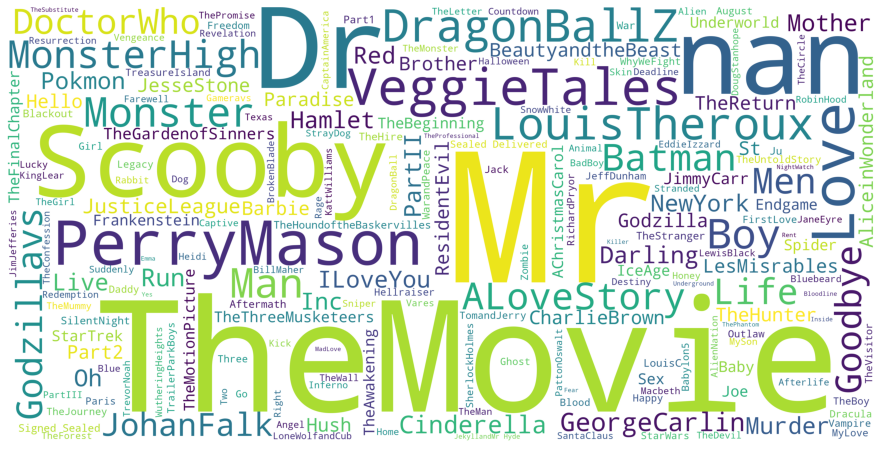

In [25]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [100]:
metadata2 = pd.read_csv("movies_metadata.csv")


/home/fitec/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning:

Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.



In [101]:
metadata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [102]:
metadata2['year'] = pd.to_datetime(metadata2['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [ ]:
###mots les plus utilises dans title et overview 

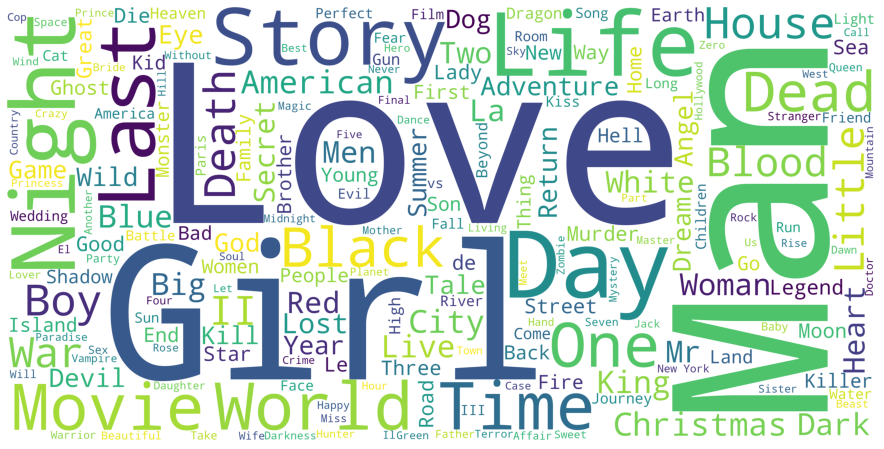

In [80]:
metadata2['title'] = metadata2['title'].astype('str')
metadata2['overview'] = metadata2['overview'].astype('str')
title_corpus = ' '.join(metadata2['title'])
overview_corpus = ' '.join(metadata2['overview'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

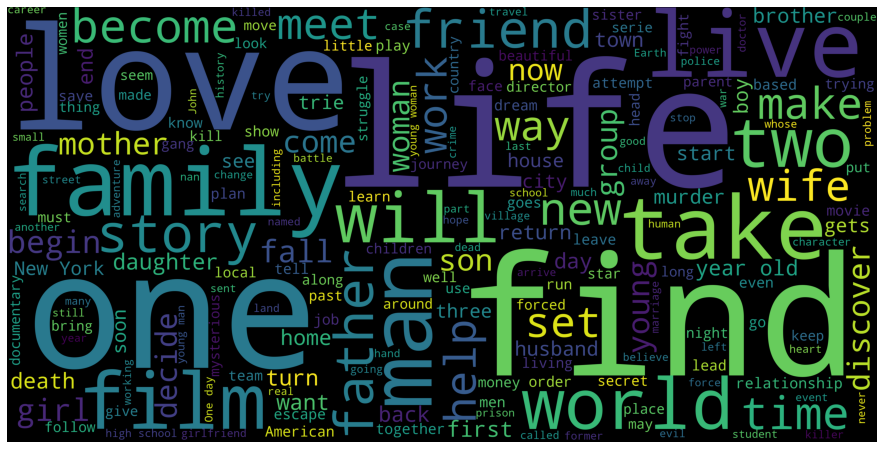

In [33]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

In [ ]:
####films par production countries

In [103]:
metadata2['production_countries'] = metadata2['production_countries'].fillna('[]').apply(ast.literal_eval)
metadata2['production_countries'] = metadata2['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])


In [104]:
s = metadata2.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

/home/fitec/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [105]:
con_df = metadata2.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

,num_movies,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India


In [112]:
data = [ dict(
        type = 'choropleth',
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['num_movies'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(250, 0, 0)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(190,180,170)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Production Countries'),
      ) ]

In [113]:
layout = dict(
    title = 'Production Countries for the MovieLens Movies',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

In [114]:
fig = dict( data=data, layout=layout )


In [115]:
import plotly.offline as py


In [116]:
py.iplot( fig, validate=False, filename='d3-world-map' )


In [96]:
###langue + utilises
lang_df = pd.DataFrame(metadata2['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


In [61]:
import seaborn as sns


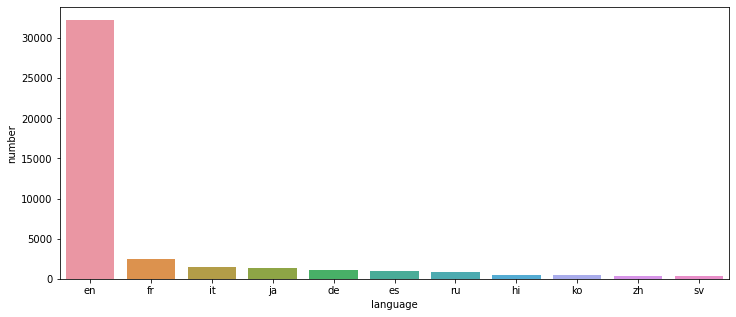

In [63]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[0:11])
plt.show()

In [68]:
metadata2['year'] = pd.to_datetime(metadata2['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [72]:
#####genres


from ast import literal_eval
# Returns the list top l elements or entire list; whichever is more.
def get_list(x, l=5):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than l elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > l:
            names = names[:l]
        return names

    #Return empty list in case of missing/malformed data
    return []

metadata2['genres'] = metadata2['genres'].apply(literal_eval)
metadata2['genres'] = metadata2['genres'].apply(get_list)


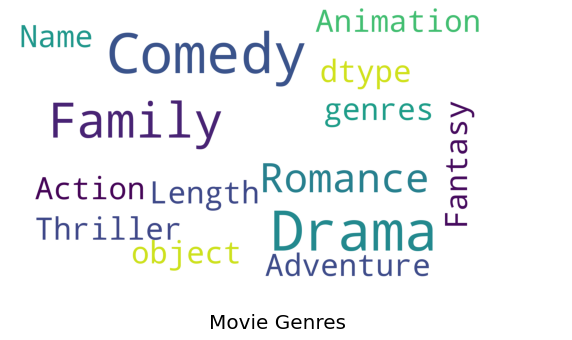

In [74]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=17,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(metadata2['genres'], title = 'Movie Genres')


In [77]:



# numbers of movies of different genres and keywords
def multi_bar(series,filename):    
    sns.set(style="whitegrid")
    count=multi_count(series,"name")
    count=sorted(count.items(),key=lambda x:x[1],reverse=True)
    count=dict(count[:30])
    f, ax = plt.subplots(figsize=(10, 6))
    plt.xticks(rotation=85, fontsize=15)
    plt.bar(count.keys(),count.values(),align="center")
#     plt.pie(count.values(),labels=count.keys())
    if saving:plt.savefig(filename,bbox_inches="tight",dpi=100)
    plt.show()

multi_bar(metadata2.genres,filename="bar_genres.png")

NameError: name 'group_indices' is not defined

In [76]:
def multi_count(series,index="id"):
    return {k:len(v) for (k,v) in group_indices(series,index).items()}

In [78]:
def group_indices(series,index="id"):
    d={}
    for i in range(series.size):
        l=eval(series.iloc[i])
        for x in l:
            d.setdefault(x[index],[])
            d[x[index]].append(i)
    return d

In [79]:



# numbers of movies of different genres and keywords
def multi_bar(series,filename):    
    sns.set(style="whitegrid")
    count=multi_count(series,"name")
    count=sorted(count.items(),key=lambda x:x[1],reverse=True)
    count=dict(count[:30])
    f, ax = plt.subplots(figsize=(10, 6))
    plt.xticks(rotation=85, fontsize=15)
    plt.bar(count.keys(),count.values(),align="center")
#     plt.pie(count.values(),labels=count.keys())
    if saving:plt.savefig(filename,bbox_inches="tight",dpi=100)
    plt.show()

multi_bar(metadata2.genres,filename="bar_genres.png")

TypeError: eval() arg 1 must be a string, bytes or code object